## Data Preprocessing of centralized datasets 

In [4]:
import zipfile
import pandas as pd
import os

# Directory containing the ZIP files
data_dir = 'data/Centralized'

# Initialize an empty list to store DataFrames
dfs = []

# Define column name mappings
column_mappings = {
    'timestamp': ['Time', 'Date', 'timestamp'],
    'low': ['marketLow', 'Low', 'low'],
    'high': ['marketHigh', 'High', 'high'],
    'close': ['close', 'Close', 'marketClose'],
    'volume': ['volume', 'Volume', 'marketVolume']
}

# Function to rename columns based on mappings
def rename_columns(df):
    for standard_name, possible_names in column_mappings.items():
        for name in possible_names:
            if name in df.columns:
                df.rename(columns={name: standard_name}, inplace=True)
                break
    return df

# Iterate through all files in the directory
for file_name in os.listdir(data_dir):
    if file_name.endswith('.zip'):
        zip_path = os.path.join(data_dir, file_name)
        with zipfile.ZipFile(zip_path, 'r') as z:
            for csv_file in z.namelist():
                if csv_file.endswith('.csv'):
                    with z.open(csv_file) as f:
                        df = pd.read_csv(f)
                        df = rename_columns(df)
                        # Keep only the required columns
                        required_columns = ['timestamp', 'low', 'high', 'close', 'volume']
                        df = df[required_columns]
                        df['file_name'] = csv_file
                        df['Zip file name'] = file_name
                        dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

combined_df['Centralized/Decentralized'] = 1

# Display some heads of the combined DataFrame
print(combined_df.head())

             timestamp    low   high  close  volume  \
0  2022-09-30 04:21:00  35.14  35.14  35.14   300.0   
1  2022-09-30 04:53:00  35.23  35.23  35.23   200.0   
2  2022-09-30 06:53:00  35.03  35.03  35.03  1200.0   
3  2022-09-30 07:00:00  35.03  35.03  35.03   900.0   
4  2022-09-30 07:32:00  35.01  35.01  35.01   500.0   

                    file_name                      Zip file name  \
0  EEM_1min_firstratedata.csv  EEM_1min_sample_firstratedata.zip   
1  EEM_1min_firstratedata.csv  EEM_1min_sample_firstratedata.zip   
2  EEM_1min_firstratedata.csv  EEM_1min_sample_firstratedata.zip   
3  EEM_1min_firstratedata.csv  EEM_1min_sample_firstratedata.zip   
4  EEM_1min_firstratedata.csv  EEM_1min_sample_firstratedata.zip   

   Centralized/Decentralized  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1  


## Data Preprocessing of decentralized datasets - TO DO

In [6]:
# Write here the code to get decentralized datasets

# Get eterscan Data
"""
import requests
import json

# Etherscan API details
api_key = "5QWEKQCCI9VPTBFP6TRZU4HIE7AGTKAYR1"
address = "0x0bAe6494d778C57E1991F8651aef06f786fA23DC"
url = f"https://api.etherscan.io/api?module=account&action=txlist&address={address}&startblock=0&endblock=99999999&page=1&offset=10000&sort=asc&apikey={api_key}"

# Fetch data
response = requests.get(url)
data = response.json()

# Save data to a file
with open("transactions.json", "w") as file:
    json.dump(data, file, indent=4)

print("Transactions saved to transactions.json")
"""

'\nimport requests\nimport json\n\n# Etherscan API details\napi_key = "5QWEKQCCI9VPTBFP6TRZU4HIE7AGTKAYR1"\naddress = "0x0bAe6494d778C57E1991F8651aef06f786fA23DC"\nurl = f"https://api.etherscan.io/api?module=account&action=txlist&address={address}&startblock=0&endblock=99999999&page=1&offset=10000&sort=asc&apikey={api_key}"\n\n# Fetch data\nresponse = requests.get(url)\ndata = response.json()\n\n# Save data to a file\nwith open("transactions.json", "w") as file:\n    json.dump(data, file, indent=4)\n\nprint("Transactions saved to transactions.json")\n'

In [3]:
# Display the name of each ZIP file along with each CSV file inside

# Get the unique ZIP file names
zip_files = combined_df['Zip file name'].unique()

for zip_file in zip_files:
    print(f"ZIP file: {zip_file}")
    
    # Filter the DataFrame for the current ZIP file
    df_zip = combined_df[combined_df['Zip file name'] == zip_file]
    
    # Get the unique CSV file names within the current ZIP file
    csv_files = df_zip['file_name'].unique()
    
    for csv_file in csv_files:
        print(f"  - {csv_file}")

ZIP file: EEM_1min_sample_firstratedata.zip
  - EEM_1min_firstratedata.csv
ZIP file: HFTTradingMAP-main.zip
  - HFTTradingMAP-main/HFTData/AAPL_n.csv
  - HFTTradingMAP-main/HFTData/AEO_n.csv
  - HFTTradingMAP-main/HFTData/AMZN_n.csv
  - HFTTradingMAP-main/HFTData/BAC_n.csv
  - HFTTradingMAP-main/HFTData/CPRI_n.csv
  - HFTTradingMAP-main/HFTData/ETHUSD-5m-data.csv
  - HFTTradingMAP-main/HFTData/GES_n.csv
  - HFTTradingMAP-main/HFTData/GOOG_n.csv
  - HFTTradingMAP-main/HFTData/GS_n.csv
  - HFTTradingMAP-main/HFTData/HD_n.csv
  - HFTTradingMAP-main/HFTData/HSBC_n.csv
  - HFTTradingMAP-main/HFTData/JCP_n.csv
  - HFTTradingMAP-main/HFTData/JPM_n.csv
  - HFTTradingMAP-main/HFTData/MSFT_n.csv
  - HFTTradingMAP-main/HFTData/TGT_n.csv
  - HFTTradingMAP-main/HFTData/TIF_n.csv
  - HFTTradingMAP-main/HFTData/WMT_n.csv
ZIP file: minDataSum.zip
  - A.csv
  - AG.csv
  - AL.csv
  - AP.csv
  - AU.csv
  - B.csv
  - BU.csv
  - C.csv
  - CF.csv
  - CJ.csv
  - CS.csv
  - CU.csv
  - CY.csv
  - EB.csv
  - EG

Average Spread by Exchange Type:
 Centralized/Decentralized
1    0.006131
Name: Spread, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_22212\3438994441.py:26: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_active = df.resample(active_threshold, on='timestamp').mean(numeric_only=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_22212\3438994441.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_passive = df.resample(passive_threshold, on='timestamp').mean(numeric_only=True)


Active Strategy - Average Slippage: -0.027079607498982302
Passive Strategy - Average Slippage: -0.023953220489357933
Centralized Average Slippage: nan
Decentralized Average Slippage: nan


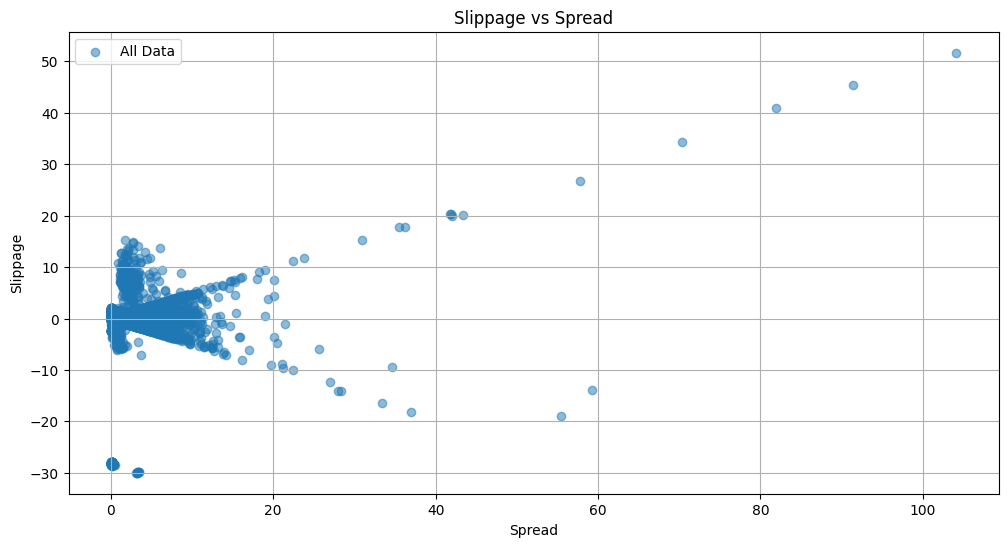

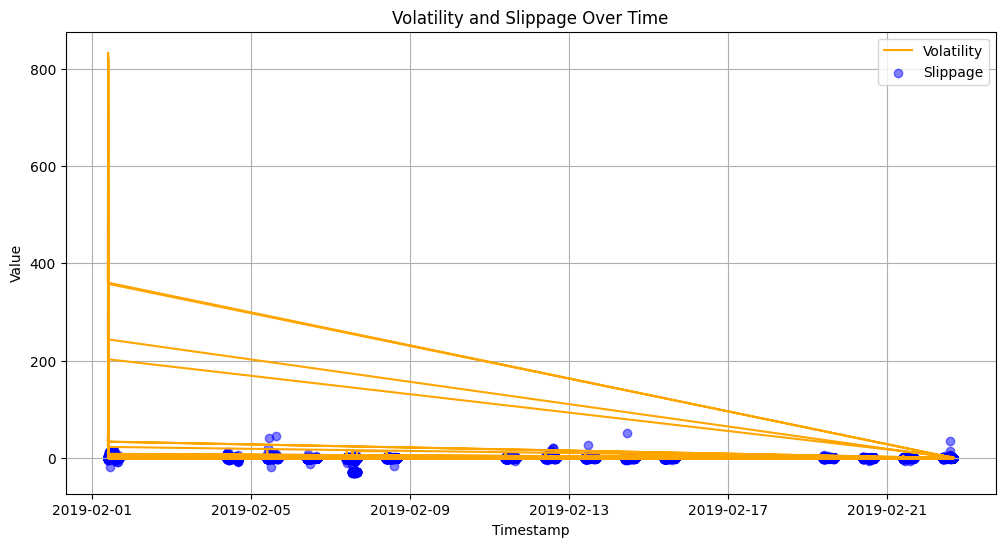

In [10]:
import matplotlib.pyplot as plt

# Load dataset
df = combined_df.copy()

# Ensure timestamp is parsed correctly
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%Y %H:%M', errors='coerce')

# Preprocessing: Calculate Mid-Price, Slippage, and Spread
df['Mid-Price'] = (df['low'] + df['high']) / 2
df['Slippage'] = df['close'] - df['Mid-Price']
df['Spread'] = df['high'] - df['low']

# Liquidity Analysis: Average Spread
liquidity = df.groupby('Centralized/Decentralized')['Spread'].mean()
print("Average Spread by Exchange Type:\n", liquidity)

# Volatility Analysis: Rolling Volatility
df['Volatility'] = df['close'].rolling(window=20).std()

# Active vs Passive Strategy Analysis
# Define Active and Passive as sample thresholds (you can refine)
active_threshold = '1T'  # Resample to 1-minute intervals
passive_threshold = '1H'  # Resample to 1-hour intervals

df_active = df.resample(active_threshold, on='timestamp').mean(numeric_only=True)
df_passive = df.resample(passive_threshold, on='timestamp').mean(numeric_only=True)

# Compare Slippage
print("Active Strategy - Average Slippage:", df_active['Slippage'].mean())
print("Passive Strategy - Average Slippage:", df_passive['Slippage'].mean())

# Centralized vs Decentralized Comparison
centralized = df[df['Centralized/Decentralized'] == 'Centralized']
decentralized = df[df['Centralized/Decentralized'] == 'Decentralized']

print("Centralized Average Slippage:", centralized['Slippage'].mean())
print("Decentralized Average Slippage:", decentralized['Slippage'].mean())

# Visualization: Slippage vs Spread
plt.figure(figsize=(12, 6))
plt.scatter(df['Spread'], df['Slippage'], alpha=0.5, label='All Data')
plt.xlabel('Spread')
plt.ylabel('Slippage')
plt.title('Slippage vs Spread')
plt.legend()
plt.grid()
plt.show()

# Visualization: Volatility and Slippage
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['Volatility'], label='Volatility', color='orange')
plt.scatter(df['timestamp'], df['Slippage'], alpha=0.5, label='Slippage', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Volatility and Slippage Over Time')
plt.legend()
plt.grid()
plt.show()
